In [6]:
# étape 1:Import des bibliothèques nécessaires


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.dates as dates
import plotly.express as px
import datetime as dt
import os
import seaborn as sns


In [8]:
#étape 2: Charger vos données

In [9]:
data=pd.read_csv("C:/dataset/NFLX.csv")

In [10]:
# Afficher les données
data

Date        Open        High         Low       Close   Adj Close  \
0     2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
1     2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2     2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
3     2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
4     2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   
...          ...         ...         ...         ...         ...         ...   
1002  2019-12-10  296.119995  298.940002  292.019989  293.119995  293.119995   
1003  2019-12-11  294.489990  299.429993  294.200012  298.929993  298.929993   
1004  2019-12-12  295.670013  299.170013  295.059998  298.440002  298.440002   
1005  2019-12-13  298.500000  301.799988  297.250000  298.500000  298.500000   
1006  2019-12-16  300.850006  305.709991  298.630005  304.209991  304.209991   

        Volume  
0     13181000  
1     17284900  
2     17948100  
3     11670000  
4      9689000  
...        ...  
1002  10476100  
1003   5589800  
1004   4766600  
1005   3879700  
1006   4658900  

[1007 rows x 7 columns]

In [11]:
# Afficher les premières lignes des données
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
1  2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2  2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
3  2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
4  2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   

     Volume  
0  13181000  
1  17284900  
2  17948100  
3  11670000  
4   9689000

In [12]:
# Afficher les derniere lignes des données
data.tail()

Date        Open        High         Low       Close   Adj Close  \
1002  2019-12-10  296.119995  298.940002  292.019989  293.119995  293.119995   
1003  2019-12-11  294.489990  299.429993  294.200012  298.929993  298.929993   
1004  2019-12-12  295.670013  299.170013  295.059998  298.440002  298.440002   
1005  2019-12-13  298.500000  301.799988  297.250000  298.500000  298.500000   
1006  2019-12-16  300.850006  305.709991  298.630005  304.209991  304.209991   

        Volume  
1002  10476100  
1003   5589800  
1004   4766600  
1005   3879700  
1006   4658900

In [13]:
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
1     2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2     2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
3     2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
4     2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   
...          ...         ...         ...         ...         ...         ...   
1002  2019-12-10  296.119995  298.940002  292.019989  293.119995  293.119995   
1003  2019-12-11  294.489990  299.429993  294.200012  298.929993  298.929993   
1004  2019-12-12  295.670013  299.170013  295.059998  298.440002  298.440002   
1005  2019-12-13  298.500000  301.799988  297.250000  298.500000  298.500000   
1006  2019-12-16  300.850006  305.709991  298.630005  304.209991  304.209991   

        Volume  
0     13181000  
1    

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [15]:
#étape 3: Visualisation  des données

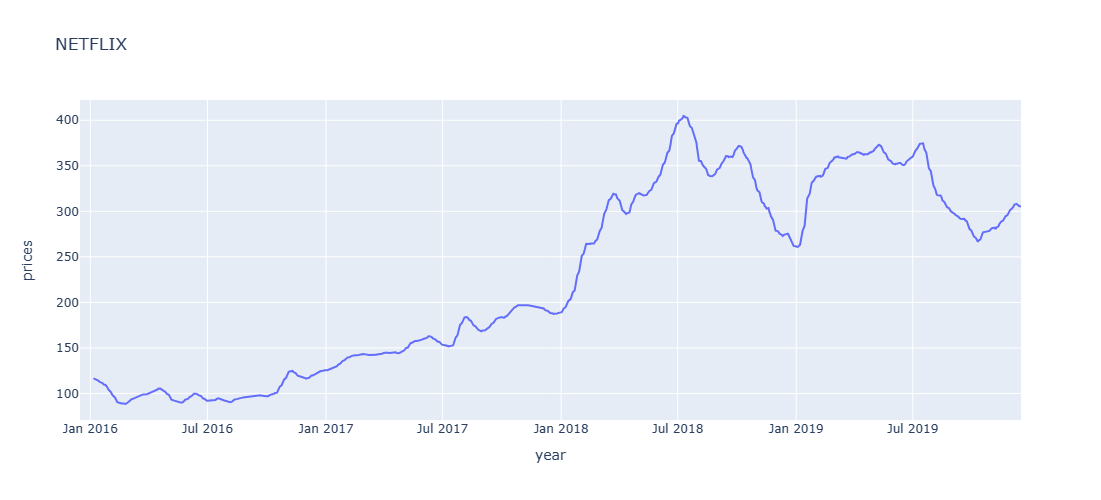

In [16]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Open'].rolling(window=14).mean(),name="netflix"),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="NETFLIX")
fig.update_xaxes(title_text="year")
fig.update_yaxes(title_text="prices",secondary_y=False)
fig.show()


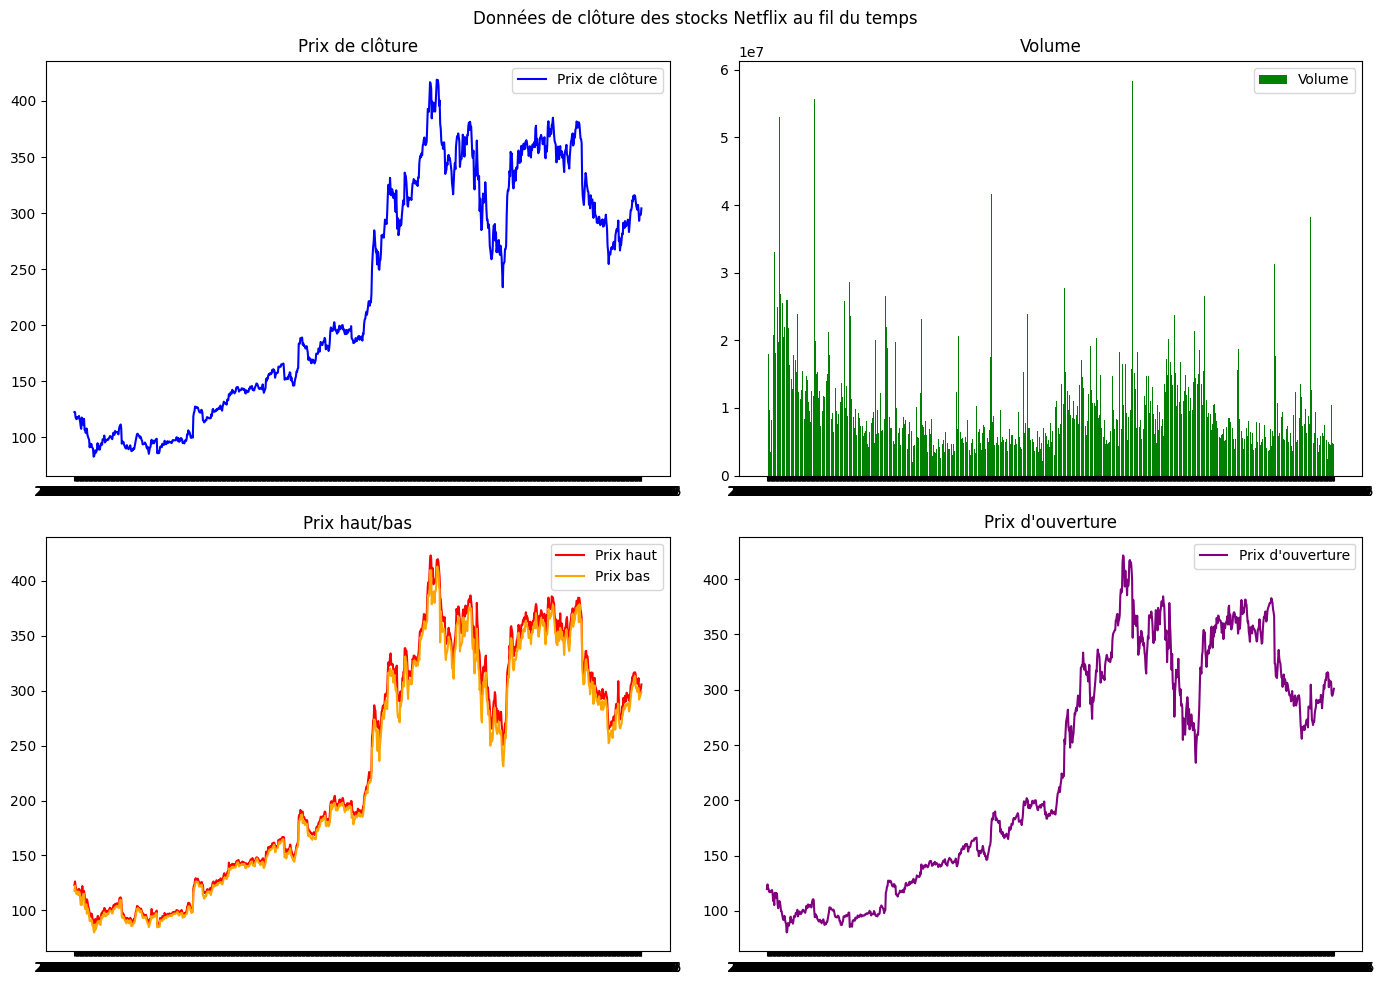

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Tracé du prix de clôture
axes[0, 0].plot(data['Date'], data['Close'], label='Prix de clôture', color='blue')
axes[0, 0].set_title('Prix de clôture')

# Tracé du volume
axes[0, 1].bar(data['Date'], data['Volume'], label='Volume', color='green')
axes[0, 1].set_title('Volume')

# Tracé du prix haut/bas
axes[1, 0].plot(data['Date'], data['High'], label='Prix haut', color='red')
axes[1, 0].plot(data['Date'], data['Low'], label='Prix bas', color='orange')
axes[1, 0].set_title('Prix haut/bas')

# Tracé du prix d'ouverture
axes[1, 1].plot(data['Date'], data['Open'], label='Prix d\'ouverture', color='purple')
axes[1, 1].set_title('Prix d\'ouverture')

# Ajouter des titres généraux
fig.suptitle('Données de clôture des stocks Netflix au fil du temps')

# Ajouter les légendes
for ax in axes.flat:
    ax.legend()

# Ajuster l'espace entre les sous-plots
plt.tight_layout()
plt.show()


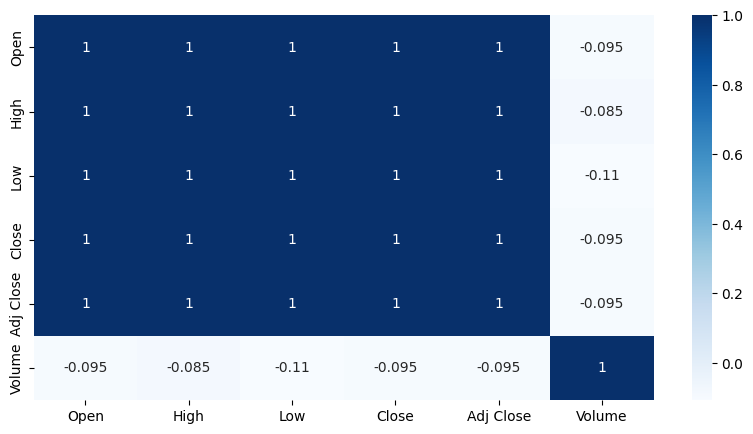

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(numeric_only=True), cmap='Blues', annot=True)
plt.show()


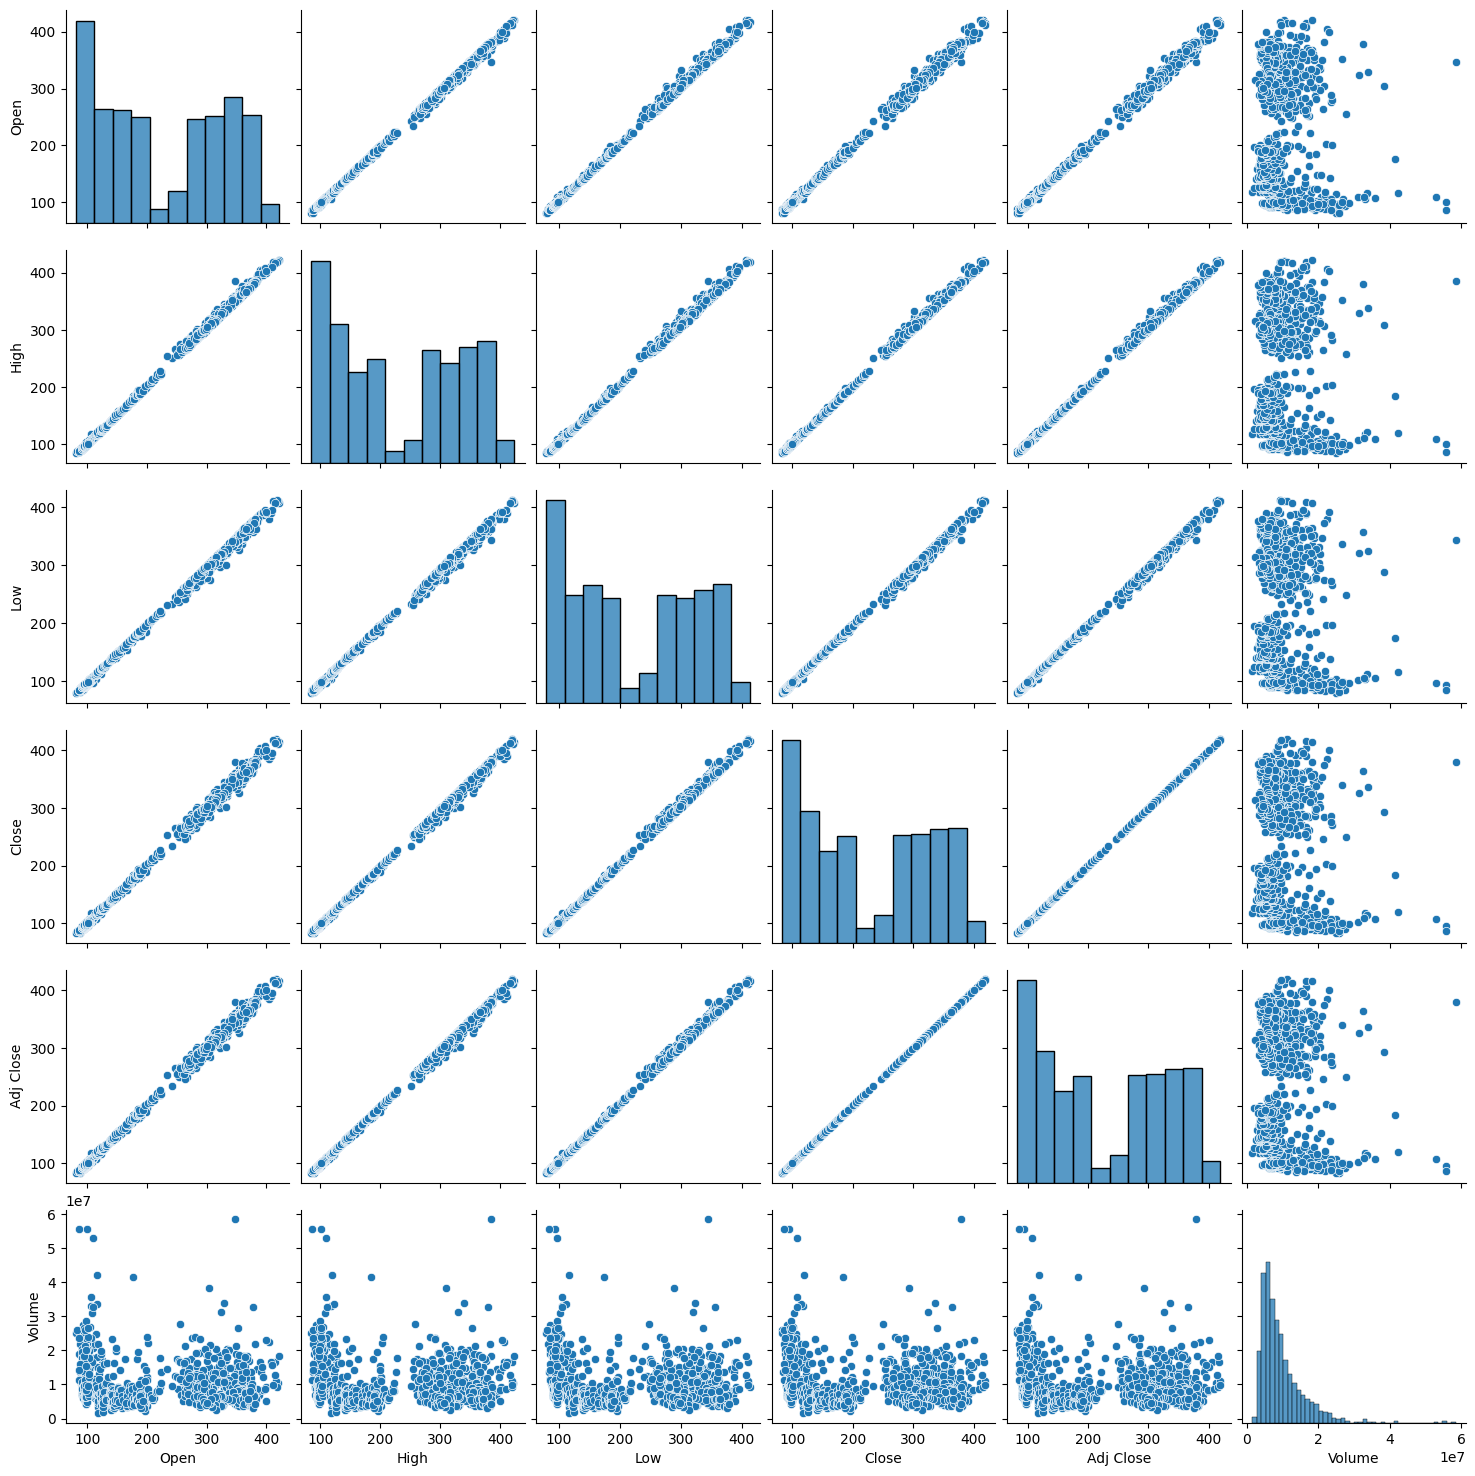

In [19]:
sns.pairplot(data)

<Axes: >

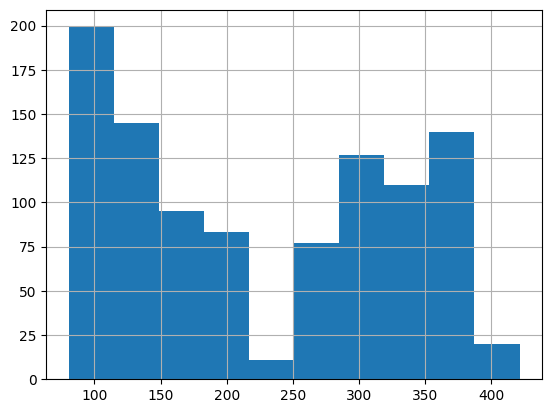

In [20]:
data['Open'].hist()

<Axes: >

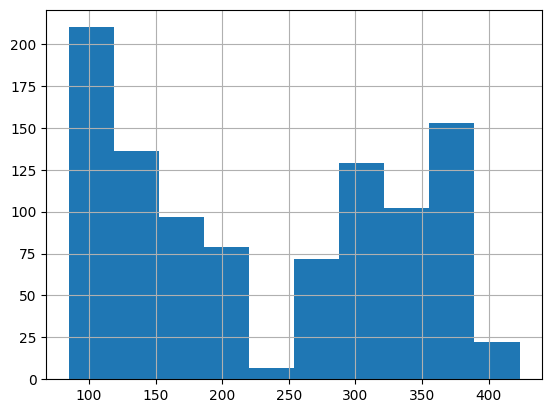

In [21]:
data['High'].hist()

<Axes: >

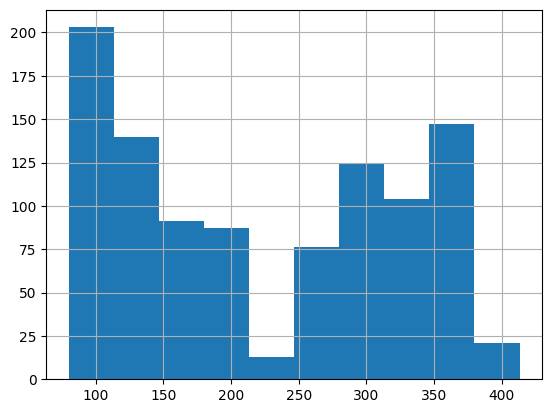

In [22]:
data['Low'].hist()

<Axes: >

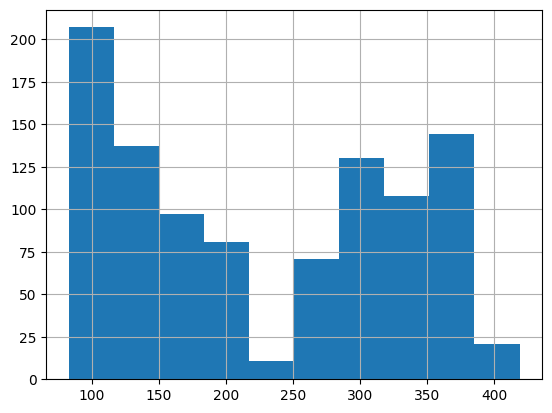

In [23]:
data['Close'].hist()

<Axes: >

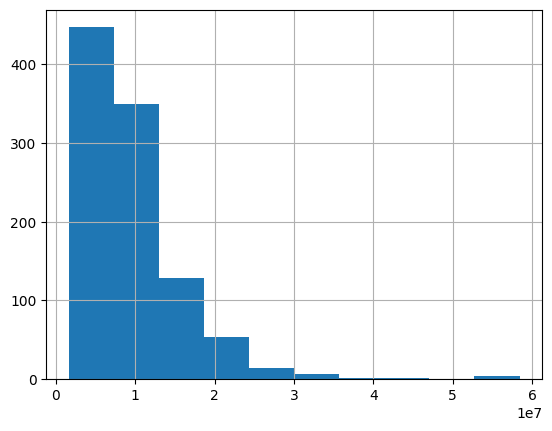

In [24]:
data['Volume'].hist()

<Axes: >

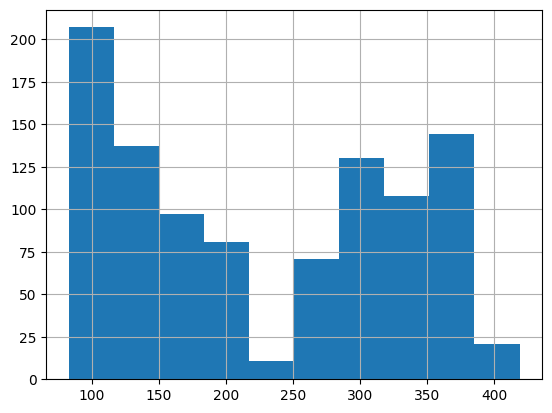

In [25]:
data['Adj Close'].hist()

In [26]:
#étape 4:preparation des donnees

In [27]:
# Afficher les informations sur les valeurs manquantes
print("Valeurs manquantes avant le traitement :")
print(data.isnull().sum())
#pas des valeurs manquantes


Valeurs manquantes avant le traitement :
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [28]:
data.describe()


Open         High          Low        Close    Adj Close  \
count  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000   
mean    226.708094   229.972979   223.105690   226.670159   226.670159   
std     103.305422   104.851349   101.458611   103.203785   103.203785   
min      80.570000    84.699997    79.949997    82.790001    82.790001   
25%     125.779999   127.165001   124.355000   125.514999   125.514999   
50%     197.850006   199.440002   195.330002   198.000000   198.000000   
75%     325.529999   330.835006   318.869995   325.220001   325.220001   
max     421.380005   423.209991   413.079987   418.970001   418.970001   

             Volume  
count  1.007000e+03  
mean   9.730586e+06  
std    6.398967e+06  
min    1.616300e+06  
25%    5.573200e+06  
50%    7.857600e+06  
75%    1.178630e+07  
max    5.841040e+07

In [29]:
# Identifier les lignes dupliquées
duplicates_mask = data.duplicated()

# Afficher les lignes dupliquées
duplicates = data[duplicates_mask]
# Afficher les informations sur les lignes dupliquées
print("Lignes dupliquées :")
print(duplicates)
# pas de lignes dupliquées dans votre DataFrame sur la base de toutes les colonnes

Lignes dupliquées :
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [30]:
data = data.drop(columns=['Adj Close'], axis=1)

In [31]:
data.head()

Date        Open        High         Low       Close    Volume
0  2015-12-16  119.800003  123.000000  118.089996  122.639999  13181000
1  2015-12-17  123.970001  126.349998  122.419998  122.510002  17284900
2  2015-12-18  120.849998  122.190002  117.919998  118.019997  17948100
3  2015-12-21  119.510002  119.589996  115.660004  116.629997  11670000
4  2015-12-22  117.300003  117.430000  114.860001  116.239998   9689000

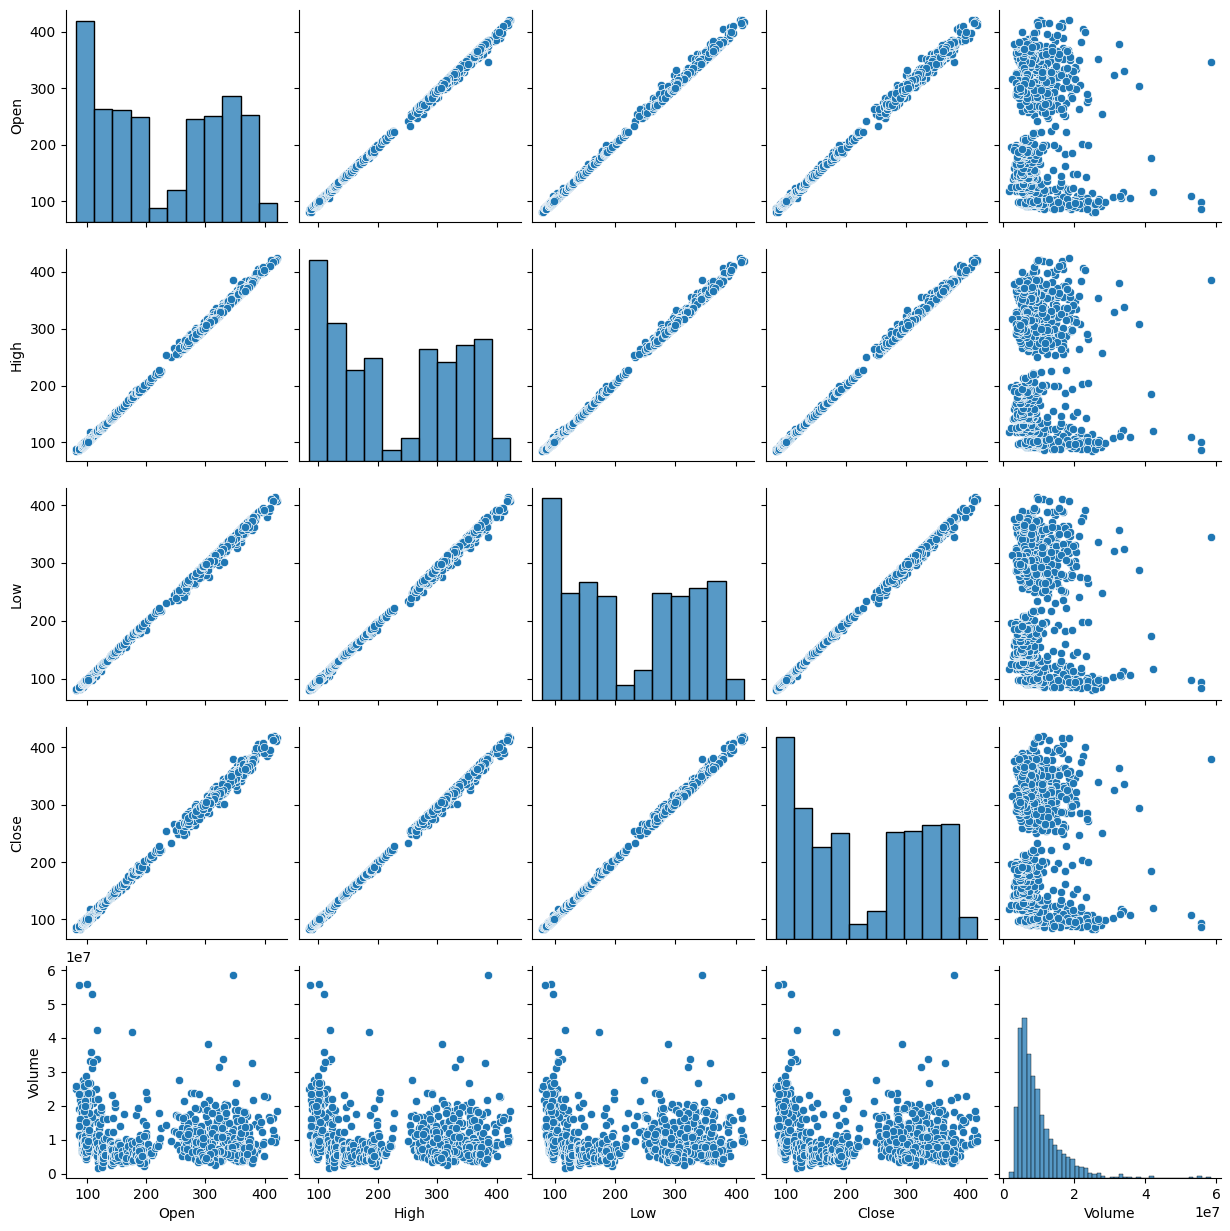

In [32]:
sns.pairplot(data)

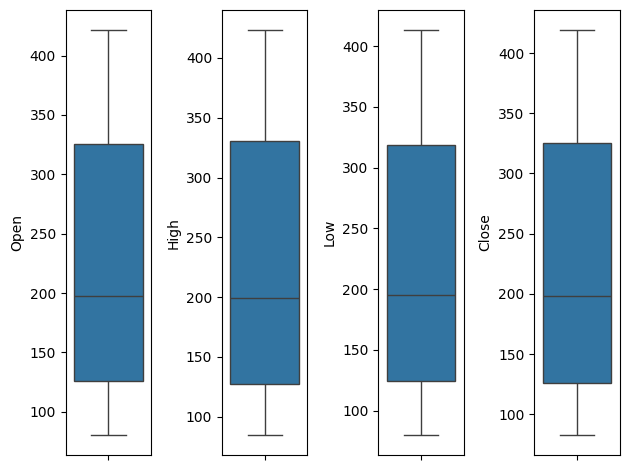

In [33]:
f, axes=plt.subplots(1,4)
sns.boxplot(y='Open', data=data, ax=axes[0])
sns.boxplot(y='High', data=data, ax=axes[1])
sns.boxplot(y='Low', data=data, ax=axes[2])
sns.boxplot(y='Close', data=data, ax=axes[3])
plt.tight_layout()

In [34]:
# Calcul de la longueur totale des données
n = len(data)

# Sélection des premiers 90% des données pour l'ensemble d'entraînement
train_data = data[0:(n // 10) * 9]

# Sélection des 10% restants des données pour l'ensemble de test
test_data = data[(n // 10) * 9:]


In [35]:
test_data[0:3]

Date        Open        High         Low       Close    Volume
900  2019-07-17  366.250000  366.500000  361.750000  362.440002  13639500
901  2019-07-18  323.760010  329.850006  320.299988  325.209991  31305900
902  2019-07-19  323.399994  325.850006  314.230011  315.100006  16302500

In [36]:
print(len(train_data))
print(len(test_data))

900
107


In [37]:
#Normalisation des données

In [38]:
# Créer un objet MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))



# Appliquer la normalisation aux colonnes sélectionnées
scaled_data= scaler.fit_transform(train_data['Open'].values.reshape(-1,1))

# Afficher le DataFrame après normalisation
print(scaled_data)

[[0.11510813]
 [0.12734368]
 [0.11818901]
 [0.11425721]
 [0.10777267]
 [0.10662834]
 [0.11047211]
 [0.1076553 ]
 [0.11038409]
 [0.11261406]
 [0.10457439]
 [0.08341891]
 [0.08767347]
 [0.07253308]
 [0.10501453]
 [0.1049265 ]
 [0.09260291]
 [0.10428098]
 [0.09935154]
 [0.07358939]
 [0.06414131]
 [0.07628884]
 [0.08315485]
 [0.08142367]
 [0.0708606 ]
 [0.05636571]
 [0.05624834]
 [0.04706435]
 [0.03893664]
 [0.03353775]
 [0.03292157]
 [0.04392477]
 [0.03474078]
 [0.02620228]
 [0.02247587]
 [0.        ]
 [0.00346234]
 [0.02473519]
 [0.02009917]
 [0.01781051]
 [0.02473519]
 [0.02805081]
 [0.04175348]
 [0.0276107 ]
 [0.02987002]
 [0.03177724]
 [0.0232681 ]
 [0.0308383 ]
 [0.04322057]
 [0.04178281]
 [0.04110795]
 [0.05117221]
 [0.05064406]
 [0.05337285]
 [0.05994542]
 [0.04234031]
 [0.04768053]
 [0.05167102]
 [0.05557349]
 [0.04879551]
 [0.05076143]
 [0.04976379]
 [0.05422377]
 [0.05847833]
 [0.06038556]
 [0.05841966]
 [0.05627769]
 [0.05302074]
 [0.05214048]
 [0.06018016]
 [0.07065521]
 [0.06

In [39]:
# Génération de séquences pour la prédiction de séries temporelles
prediction_days = 30

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)-10):      ######
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+10, 0])      ###### predict 10 days after
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [40]:
print(x_train.shape)
print(y_train.shape)

(860, 30, 1)
(860,)


In [41]:
# Afficher les dimensions des ensembles d'entraînement 
print("Dimensions de x_train :", x_train.shape)
print("Dimensions de y_train :", y_train.shape)


Dimensions de x_train : (860, 30, 1)
Dimensions de y_train : (860,)


In [42]:
x_train

array([[[0.11510813],
        [0.12734368],
        [0.11818901],
        ...,
        [0.04706435],
        [0.03893664],
        [0.03353775]],

       [[0.12734368],
        [0.11818901],
        [0.11425721],
        ...,
        [0.03893664],
        [0.03353775],
        [0.03292157]],

       [[0.11818901],
        [0.11425721],
        [0.10777267],
        ...,
        [0.03353775],
        [0.03292157],
        [0.04392477]],

       ...,

       [[0.77101609],
        [0.80924853],
        [0.80930727],
        ...,
        [0.8500337 ],
        [0.85144214],
        [0.82459435]],

       [[0.80924853],
        [0.80930727],
        [0.79416686],
        ...,
        [0.85144214],
        [0.82459435],
        [0.82928907]],

       [[0.80930727],
        [0.79416686],
        [0.79334529],
        ...,
        [0.82459435],
        [0.82928907],
        [0.85000442]]])

In [43]:
y_train

array([0.02473519, 0.02805081, 0.04175348, 0.0276107 , 0.02987002,
       0.03177724, 0.0232681 , 0.0308383 , 0.04322057, 0.04178281,
       0.04110795, 0.05117221, 0.05064406, 0.05337285, 0.05994542,
       0.04234031, 0.04768053, 0.05167102, 0.05557349, 0.04879551,
       0.05076143, 0.04976379, 0.05422377, 0.05847833, 0.06038556,
       0.05841966, 0.05627769, 0.05302074, 0.05214048, 0.06018016,
       0.07065521, 0.06414131, 0.0656084 , 0.07432294, 0.06719287,
       0.07256243, 0.06965757, 0.07203428, 0.06886535, 0.06625393,
       0.08048473, 0.08638245, 0.08823097, 0.08605969, 0.0555148 ,
       0.04040373, 0.04911827, 0.04190017, 0.04439423, 0.03793903,
       0.0340659 , 0.03207065, 0.02913647, 0.0288724 , 0.03377249,
       0.03060356, 0.0303395 , 0.02423638, 0.02981134, 0.03101434,
       0.03471143, 0.02860832, 0.02001115, 0.02050996, 0.02473519,
       0.02253455, 0.02813886, 0.02790412, 0.03641326, 0.04521582,
       0.05407705, 0.06642997, 0.06417066, 0.06566708, 0.06141

In [44]:
#étape 6:Construction du modèle LSTM

In [45]:
def LSTM_model():
    # Création d'une instance de modèle séquentiel
    model = Sequential()

    # Ajout d'une couche LSTM avec 50 unités, retourne les séquences et prend en compte la forme d'entrée
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

    # Ajout d'une couche de suppression aléatoire pour prévenir le surapprentissage
    model.add(Dropout(0.2))

    # Ajout d'une autre couche LSTM avec 50 unités et retourne les séquences
    model.add(LSTM(units=50, return_sequences=True))

    # Ajout d'une couche de suppression aléatoire
    model.add(Dropout(0.2))

    # Ajout d'une couche LSTM avec 50 unités
    model.add(LSTM(units=50))

    # Ajout d'une couche de suppression aléatoire
    model.add(Dropout(0.2))

    # Ajout d'une couche dense (entièrement connectée) avec 1 unité (pour la régression)
    model.add(Dense(units=1))

    # Retourne le modèle construit
    return model

In [46]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [47]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 1, save_best_only = True)
his=model.fit(x_train,y_train,epochs=20,batch_size=32,callbacks=[checkpointer])

Epoch 1/20
27/27 [==============================] - 10s 49ms/step - loss: 0.0409 - accuracy: 0.0012
Epoch 2/20
27/27 [==============================] - 1s 50ms/step - loss: 0.0081 - accuracy: 0.0012
Epoch 3/20
27/27 [==============================] - 2s 56ms/step - loss: 0.0081 - accuracy: 0.0012
Epoch 4/20
27/27 [==============================] - 1s 49ms/step - loss: 0.0079 - accuracy: 0.0012
Epoch 5/20
27/27 [==============================] - 1s 46ms/step - loss: 0.0075 - accuracy: 0.0012
Epoch 6/20
27/27 [==============================] - 1s 46ms/step - loss: 0.0074 - accuracy: 0.0012
Epoch 7/20
27/27 [==============================] - 1s 47ms/step - loss: 0.0072 - accuracy: 0.0012
Epoch 8/20
27/27 [==============================] - 1s 47ms/step - loss: 0.0072 - accuracy: 0.0012
Epoch 9/20
27/27 [==============================] - 1s 46ms/step - loss: 0.0067 - accuracy: 0.0012
Epoch 10/20
27/27 [==============================] - 2s 60ms/step - loss: 0.0063 - accuracy: 0.0012
Epoch 11

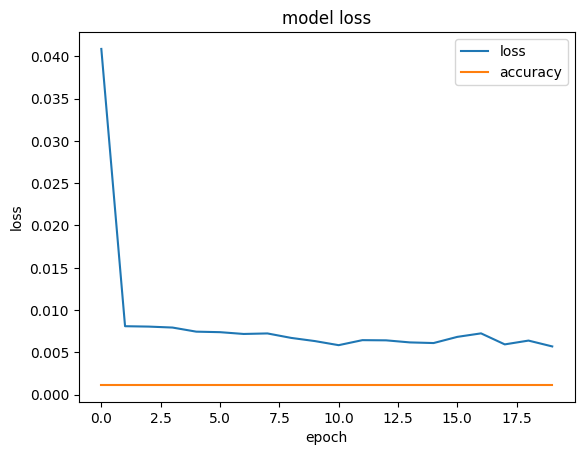

In [48]:
#évaluation du modèle
plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'], loc='upper right')
plt.show()

In [49]:
#préparez les données d'entrée pour votre modèle de prédiction 
actual_prices = test_data['Open'].values
total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [50]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

4/4 [==============================] - 2s 18ms/step


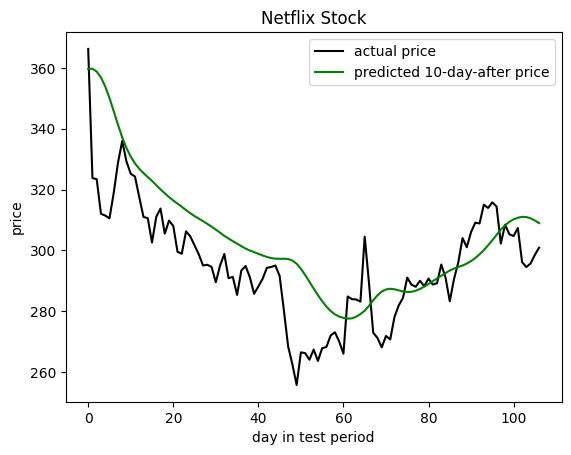

In [51]:
plt.plot(actual_prices, color='black', label=f"actual price")
plt.plot(predicted_prices, color= 'green', label=f"predicted 10-day-after price")
plt.title(f"Netflix Stock")
plt.xlabel("day in test period")
plt.ylabel(f"price")
plt.legend()
plt.show()

In [52]:
#Prédiction des nouvelles valeurs


In [53]:
# Sélection des données réelles pour la prédiction
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1), 0]]

# Conversion de la liste en un tableau numpy
real_data = np.array(real_data)

# Remodelage du tableau pour qu'il ait la forme appropriée pour le modèle LSTM
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

# Affichage de la forme du tableau
print(real_data.shape)


(1, 29, 1)


In [54]:
# Utilisation du modèle pour effectuer une prédiction sur les données réelles
prediction = model.predict(real_data)

# Inversion de la transformation effectuée précédemment avec le scaler
prediction = scaler.inverse_transform(prediction)

# Affichage de la valeur prédite
print(f"prediction: {prediction[0][0]}")


1/1 [==============================] - 1s 1s/step
prediction: 308.12628173828125
